In [1]:
import torch, torch.nn as nn, torch.optim as optim

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
train_ds = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = transform
)
test_ds = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = transform
)

100%|██████████| 9.91M/9.91M [00:01<00:00, 4.96MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.83MB/s]


In [11]:
train_loader = DataLoader(train_ds, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_ds, batch_size = 64, shuffle = False)

In [22]:
train_loader = DataLoader(train_cifar, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_cifar, batch_size = 64, shuffle = False)

torch.Size([64, 3, 32, 32])


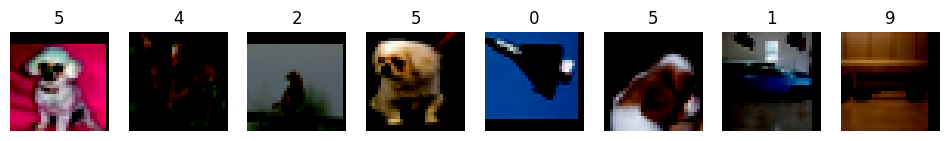

In [29]:
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))
print(images.size())
images = images[:8].squeeze()
fig, axes = plt.subplots(1,8,figsize=(12,2))
for ax, img, lbl in zip(axes, images, labels):
  ax.imshow(img.permute(1,2,0))
  ax.set_title(lbl.item())
  ax.axis('off')
plt.show()

In [ ]:
nn.Conv2d()
nn.Linear()

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(in_dim, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, num_classes)

  def forward(self, x):
    x = self.flatten(x)
    x = self.fc1(x)
    x = nn.ReLU()(x)
    x = self.fc2(x)
    x = nn.ReLU()(x)
    x = self.fc3(x)
    return x

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [6]:
class CNN(nn.Module):
  def __init__(self, in_channels=1):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=3, stride=1,padding=2)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1,padding=1)
    self.pool = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(1568, 128)
    self.fc2 = nn.Linear(128, 10)
  def forward(self, x):
    x = self.conv1(x)
    x = nn.ReLU()(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = nn.ReLU()(x)
    x = self.pool(x)
    x = x.view(-1, 1568)
    #print(x.size())
    x = self.fc1(x)
    x = nn.ReLU()(x)
    x = self.fc2(x)
    return x

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
model = nn.Sequential(nn.Conv2d(1, 16, kernel_size=3, stride=1,padding=2), nn.Flatten(),nn.Linear(28*28,128), nn.ReLU(), nn.Linear(128,64), nn.ReLU(), nn.Linear(64,10)).to(device)

In [ ]:
def function(x):
  return x**2

In [ ]:
(128, 1, 28, 28)
(128, 32, 28, 28)

In [20]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32,padding = 4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [21]:
train_cifar = datasets.CIFAR10(
    root = 'data',
    train = True,
    download = True,
    transform = transform
)
test_cifar = datasets.CIFAR10(
    root = 'data',
    train = False,
    download = True,
    transform = transform
)

In [ ]:
0.1 0.3 0.9 0.9 0 0.2 0.5 0 0.6 0.1

In [26]:
class CNN2(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, stride =1, padding =2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, stride =1, padding =2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, stride =1, padding =2)
    self.fc1 = nn.Linear(3200, 256)
    self.fc2 = nn.Linear(256, 10)
    self.pool = nn.MaxPool2d(2)
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = self.conv1(x)
    x = nn.ReLU()(x)
    x = self.pool(x)
    #print(x.size())
    x = self.conv2(x)
    x = nn.ReLU()(x)
    x = self.pool(x)
   # print(x.size())
    x = self.conv3(x)
    x = nn.ReLU()(x)
    x = self.pool(x)
    #print(x.size())
    x = x.view(-1, 3200)
    x = self.fc1(x)
    x = nn.ReLU()(x)
    x = self.fc2(x)
    x = self.dropout(x)
    return x

model = CNN2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)








In [30]:
def train_epoch(model, loader):
  model.train()
  running_loss = 0
  for X,y in loader:
    X,y = X.to(device),y.to(device)
    optimizer.zero_grad()
    pred = model(X)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*X.size(0)
  return running_loss/len(loader.dataset)

def eval_epoch(model, loader):
  model.eval()
  correct = 0
  with torch.no_grad():
    for X, y in loader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      prediction = pred.argmax(dim = 1)
      correct += (prediction == y).sum().item()
  return correct/len(loader.dataset)



for epoch in range(20):
  loss = train_epoch(model,train_loader)
  accuracy = eval_epoch(model,test_loader)
  print(f"Epoch: {epoch+1}, Loss: {loss:.4f}, Accuracy: {accuracy}")



Epoch: 1, Loss: 1.3278, Accuracy: 0.437
Epoch: 2, Loss: 1.2841, Accuracy: 0.5123
Epoch: 3, Loss: 1.2348, Accuracy: 0.5133
Epoch: 4, Loss: 1.1969, Accuracy: 0.4942
Epoch: 5, Loss: 1.1621, Accuracy: 0.5468
Epoch: 6, Loss: 1.1212, Accuracy: 0.5431
Epoch: 7, Loss: 1.0869, Accuracy: 0.5949
Epoch: 8, Loss: 1.0623, Accuracy: 0.6169
Epoch: 9, Loss: 1.0342, Accuracy: 0.6392
Epoch: 10, Loss: 1.0060, Accuracy: 0.5966
Epoch: 11, Loss: 0.9794, Accuracy: 0.6183
Epoch: 12, Loss: 0.9585, Accuracy: 0.6491
Epoch: 13, Loss: 0.9318, Accuracy: 0.6413
Epoch: 14, Loss: 0.9105, Accuracy: 0.6715
Epoch: 15, Loss: 0.8901, Accuracy: 0.6782
Epoch: 16, Loss: 0.8742, Accuracy: 0.6688
Epoch: 17, Loss: 0.8580, Accuracy: 0.6497
Epoch: 18, Loss: 0.8413, Accuracy: 0.6802
Epoch: 19, Loss: 0.8212, Accuracy: 0.6422
Epoch: 20, Loss: 0.8087, Accuracy: 0.6457
